In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import math
from scipy import stats
import seaborn as sns
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

# データの読み込み

In [55]:
data = pd.read_csv('../ゼミ関係/ゲーム分析②.csv', encoding='utf-8', index_col=0).reset_index()
data

,攻撃回,1次(0)、2次(1)、3次(2)、セット(3),得点,TO,ミドルS,ミドルG,ロングS,ロングG,サイドS,サイドG,ピヴォットS,ピヴォットG,カットインS,カットインG,リバウンドS,リバウンドG,速攻S,速攻G,その他S,その他G,7m,7mG,7人攻撃,nation,度数
0,1,3,0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ehf,1
1,2,3,1,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ehf,1
2,3,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p,1.0,NaN,ehf,1
3,4,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ehf,1
4,5,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,ehf,1
5,6,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ehf,1
6,7,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ehf,1
7,8,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ehf,1
8,9,3,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ehf,1
9,10,2,1,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ehf,1


In [56]:
data.drop(['度数'], axis=1, inplace=True)
data.columns = ['ID', 'OF_type', 'point', 'TO', 'middle_S', 'middle_G', 'distance_S', 'distance_G', 'wing_S', 'wing_G', 'PV_S', 'PV_G', 
                'BT_S', 'BT_G', 'rebound_S', 'rebound_G', 'FB_S', 'FB_G', 'other_S', 'other_G', '7m_type', '7m_G', '7th_attack', 'nation']
data['OF_type'] = data['OF_type'].replace({0:'FB1', 1:'FB2', 2:'FB3',3:'set'})
data['ID'] = np.arange(1, len(data)+1)
data = data.fillna(0)
data

,ID,OF_type,point,TO,middle_S,middle_G,distance_S,distance_G,wing_S,wing_G,PV_S,PV_G,BT_S,BT_G,rebound_S,rebound_G,FB_S,FB_G,other_S,other_G,7m_type,7m_G,7th_attack,nation
0,1,set,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,ehf
1,2,set,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,ehf
2,3,set,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,p,1.0,0.0,ehf
3,4,set,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,ehf
4,5,FB2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0.0,0.0,ehf
5,6,set,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,ehf
6,7,set,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,ehf
7,8,set,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,ehf
8,9,set,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,ehf
9,10,FB3,1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,ehf


In [57]:
ehf = data[data['nation'] == 'ehf']
japan = data[data['nation'] == 'japan']
set_data = data[data['OF_type'] == 'set'] 

# セットの生起率

In [58]:
print('セットの割合[ehf] : {:.4f}'.format((ehf[ehf['OF_type'] == 'set'].count() / len(ehf)).OF_type))
print('セットの割合[japan] : {:.4f}'.format((japan[japan['OF_type'] == 'set'].count() / len(japan)).OF_type))

セットの割合[ehf] : 0.7027
セットの割合[japan] : 0.7184


# 簡単に可視化

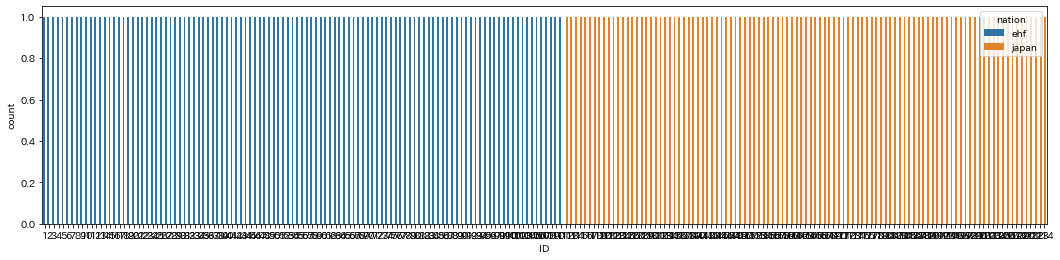

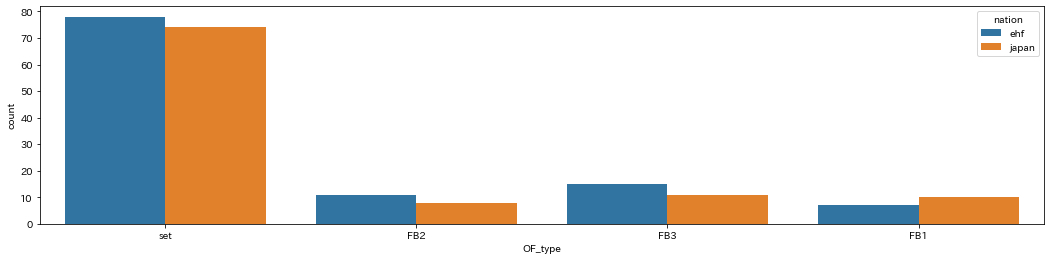

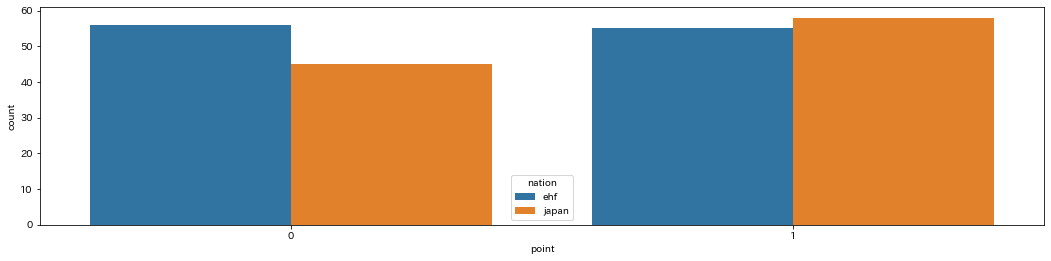

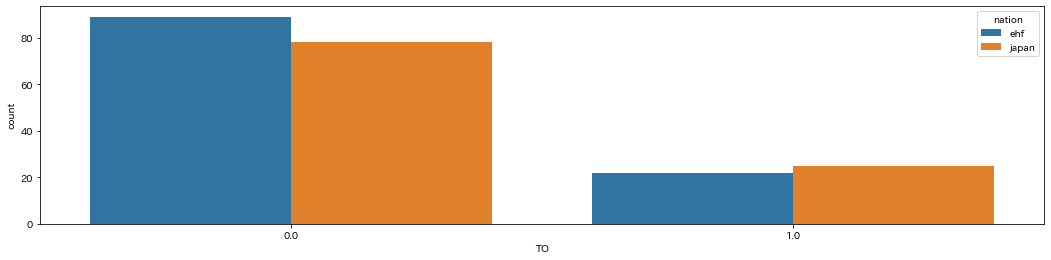

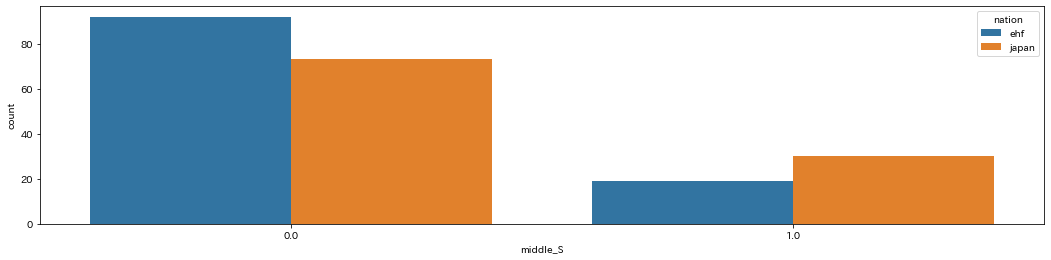

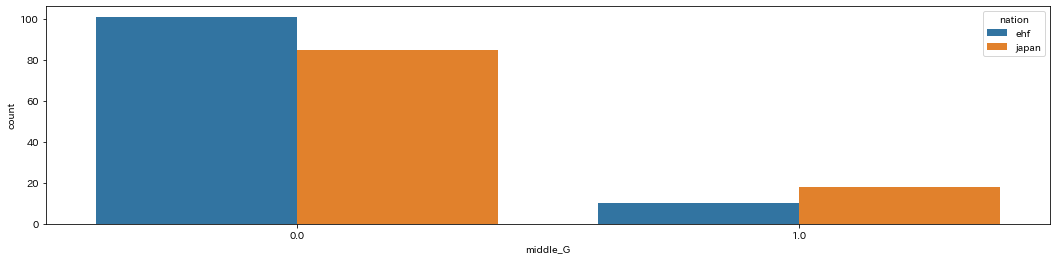

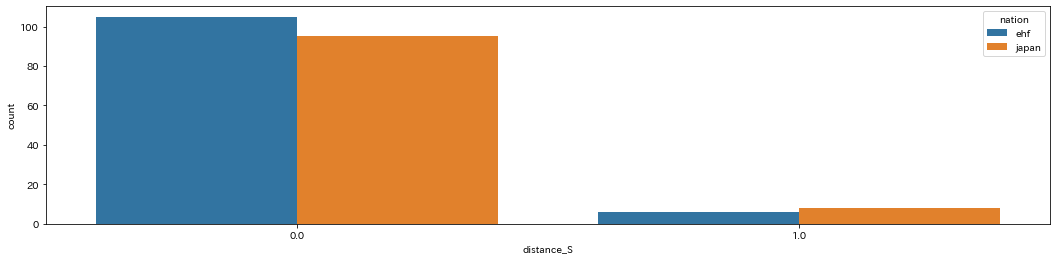

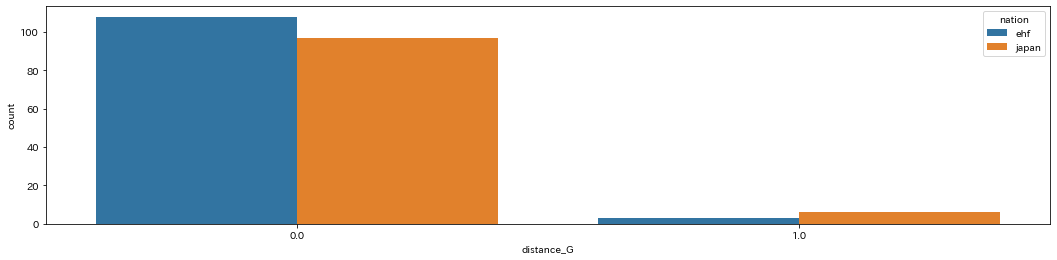

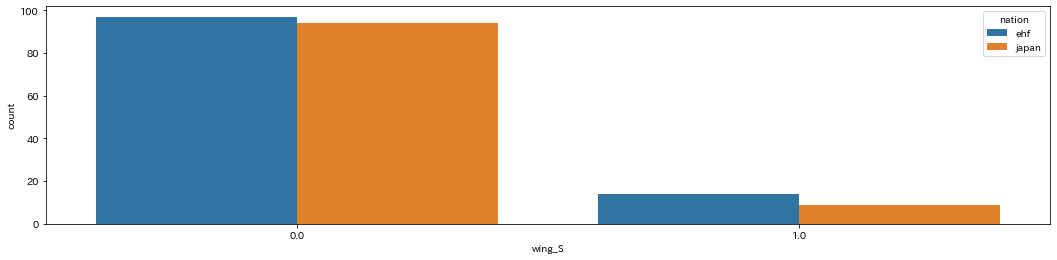

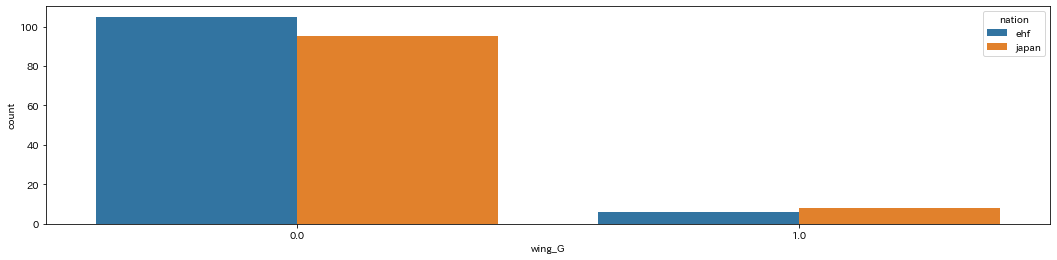

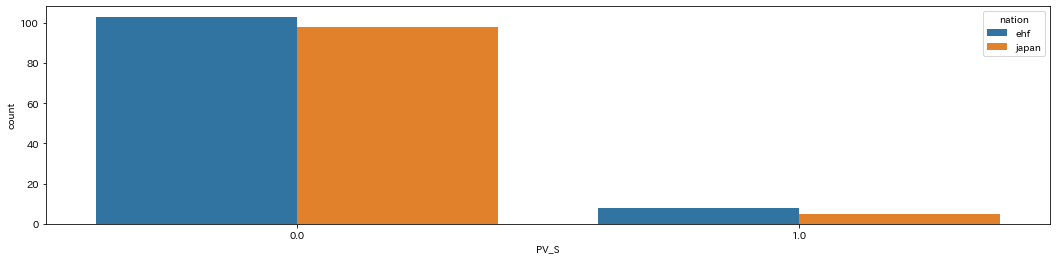

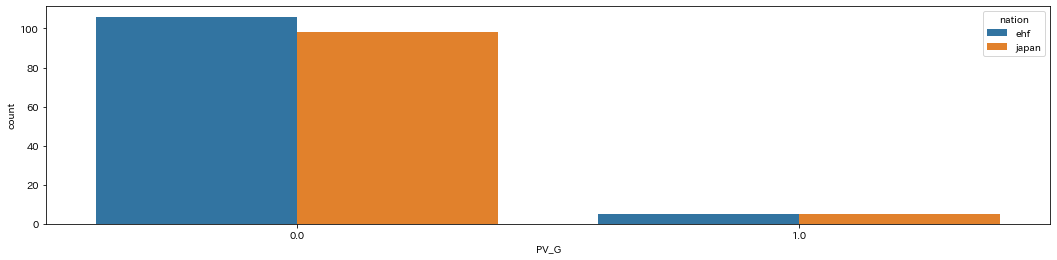

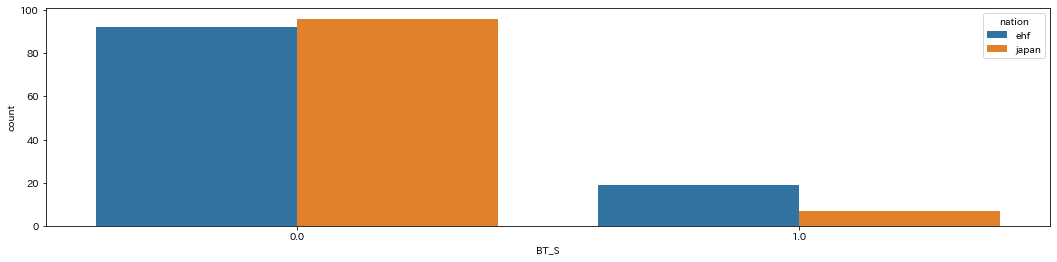

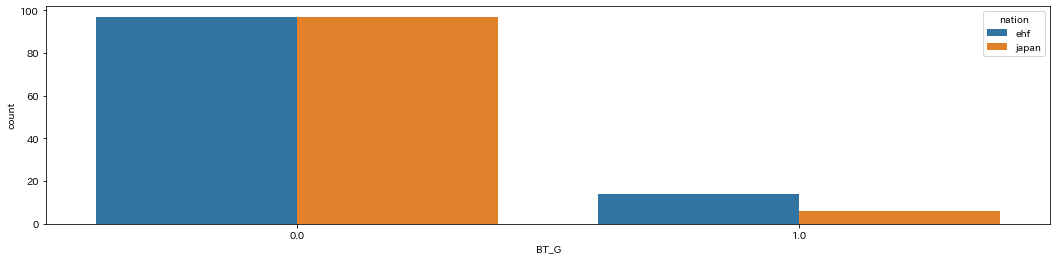

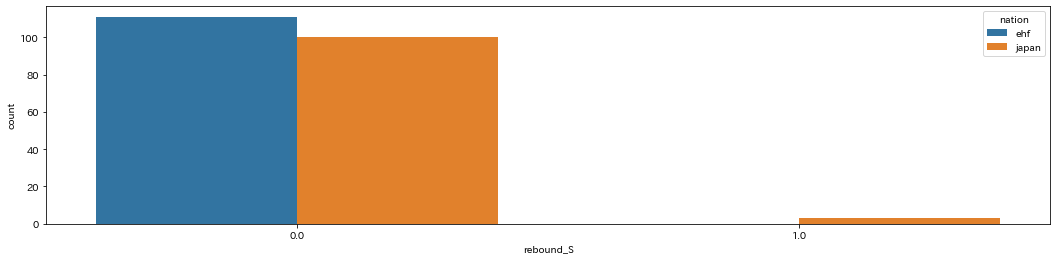

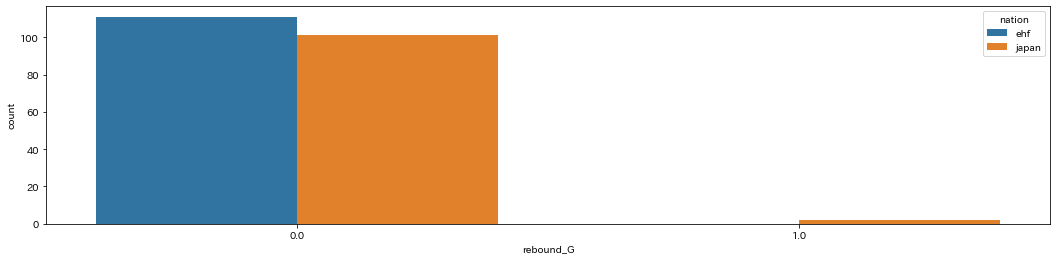

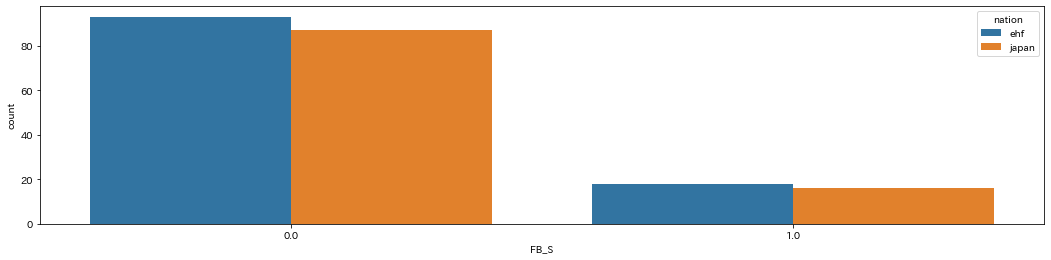

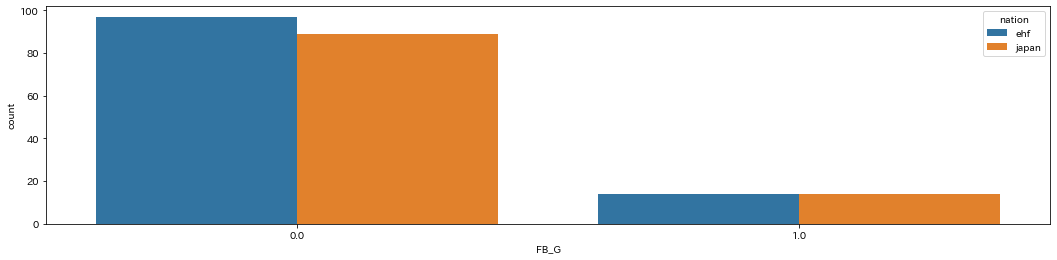

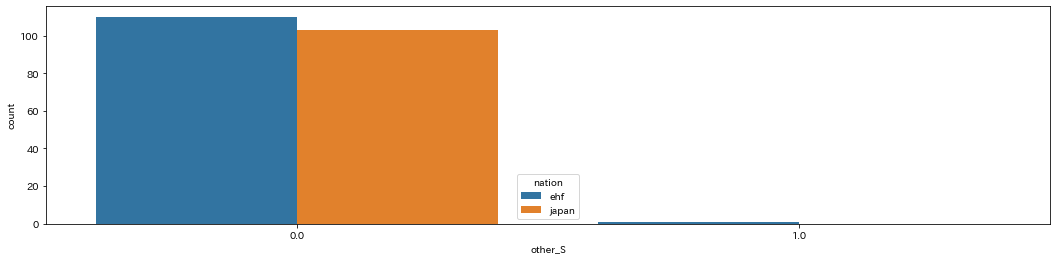

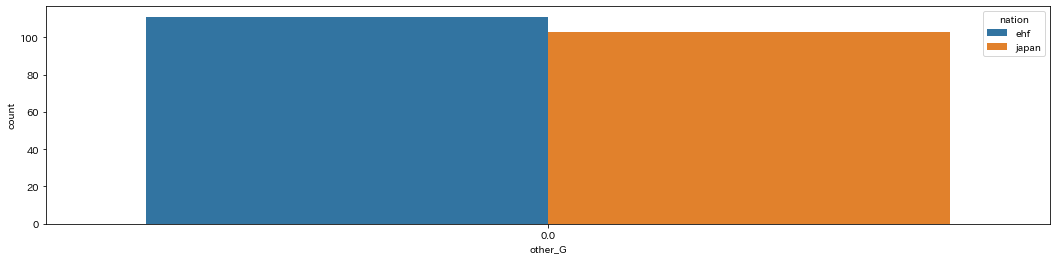

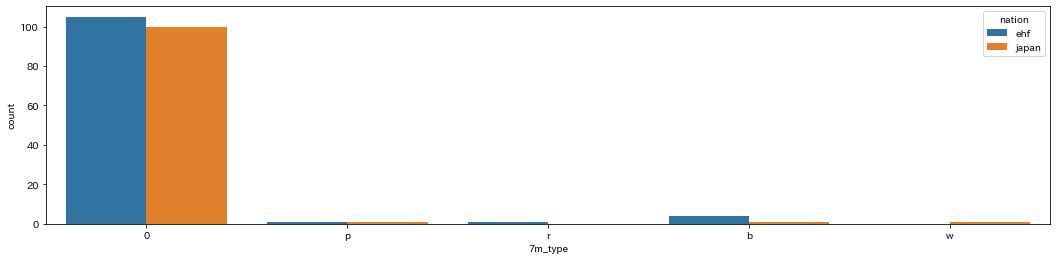

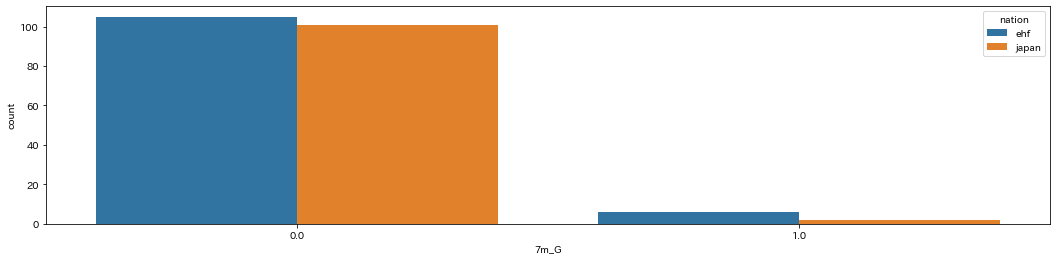

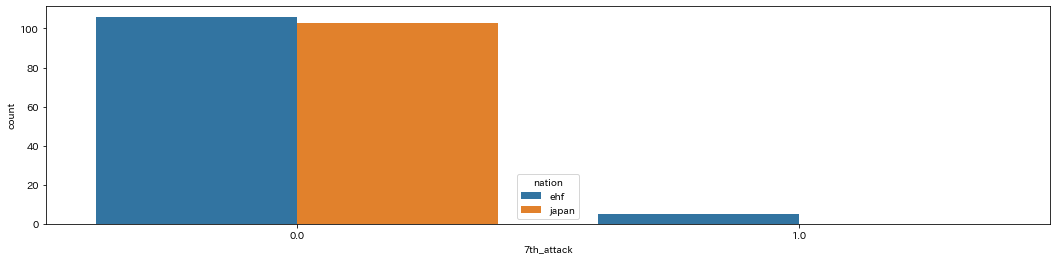

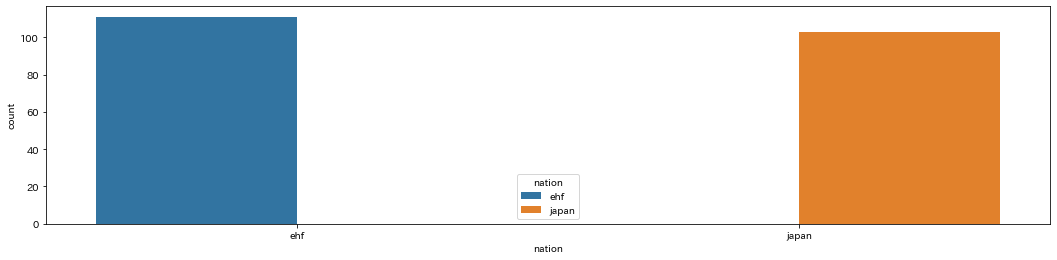

In [82]:
for i in data.columns:
    plt.figure(figsize=(18,4))
    sns.countplot(x=i, hue='nation', data=data)
    plt.show()

# セットOFに絞って各項目を分析(母比率の差の検定, カイ2乗検定)

In [110]:
def bohiritsu_test(table):
    n_ehf = table.iloc[0, 0] + table.iloc[1, 0]
    x_ehf = table.iloc[1, 0]
    n_japan = table.iloc[0, 1] + table.iloc[1, 1]
    x_japan = table.iloc[1, 1]
    p_ehf = x_ehf / n_ehf
    p_japan = x_japan / n_japan
    p_hat = (n_ehf*p_ehf + n_japan*p_japan) / (n_ehf + n_japan)

    z = (p_ehf - p_japan) / math.sqrt(p_hat*(1-p_hat)*(1/n_ehf+1/n_japan))
    print('母比率の差の統計検定量=',z)
    alpha = 0.05 # 有意水準
    z_value = stats.norm.ppf(1-alpha)
    print(z_value)
    if abs(z) < abs(z_value):
        print('有意差なし')
    else:
        print('有意差あり') 

In [111]:
def ci_2_test(table):
    x2, p, dof, expected = stats.chi2_contingency(table)

    print("カイ二乗値は %(x2)s" %locals() )
    print("確率は %(p)s" %locals() )
    print("自由度は %(dof)s" %locals() )

    if p < 0.05:
        print("有意差あり")
    else:
        print("有意差なし")

# 攻撃成功率

In [112]:
table = pd.pivot_table(set_data, columns='nation', index='point',values='ID', aggfunc='count')
table

nation,ehf,japan
point,,
0,41,38
1,37,36


In [113]:
bohiritsu_test(table)
print('*'*100)
ci_2_test(table)

母比率の差の統計検定量= -0.14958281331760237
1.6448536269514722
有意差なし
****************************************************************************************************
カイ二乗値は 0.00016438788764088814
確率は 0.989770295933359
自由度は 1
有意差なし


# TO率

In [114]:
table = pd.pivot_table(set_data, columns='nation', index='TO',values='ID', aggfunc='count')
table

nation,ehf,japan
TO,,
0.0,61,52
1.0,17,22


In [115]:
bohiritsu_test(table)
print('*'*100)
ci_2_test(table)

母比率の差の統計検定量= -1.119573436137253
1.6448536269514722
有意差なし
****************************************************************************************************
カイ二乗値は 0.8719687902805673
確率は 0.3504108403336643
自由度は 1
有意差なし


# 各ポジションのシュート生起率

### Middle

In [116]:
table = pd.pivot_table(set_data, columns='nation', index='middle_S', values='ID', aggfunc='count')
table

nation,ehf,japan
middle_S,,
0.0,62,49
1.0,16,25


In [117]:
bohiritsu_test(table)
print('*'*100)
ci_2_test(table)

母比率の差の統計検定量= -1.8426123795788603
1.6448536269514722
有意差あり
****************************************************************************************************
カイ二乗値は 2.754917586822664
確率は 0.09695581242877982
自由度は 1
有意差なし


### ロング

In [118]:
table = pd.pivot_table(set_data, columns='nation', index='distance_S', values='ID', aggfunc='count')
table

nation,ehf,japan
distance_S,,
0.0,72,66
1.0,6,8


In [119]:
bohiritsu_test(table)
print('*'*100)
ci_2_test(table)

母比率の差の統計検定量= -0.664549869146816
1.6448536269514722
有意差なし
****************************************************************************************************
カイ二乗値は 0.14742693003562585
確率は 0.70100650365904
自由度は 1
有意差なし


### サイド

In [121]:
table = pd.pivot_table(set_data, columns='nation', index='wing_S', values='ID', aggfunc='count')
table

nation,ehf,japan
wing_S,,
0.0,69,67
1.0,9,7


In [122]:
bohiritsu_test(table)
print('*'*100)
ci_2_test(table)

母比率の差の統計検定量= 0.41745573647555834
1.6448536269514722
有意差なし
****************************************************************************************************
カイ二乗値は 0.023429538135420355
確率は 0.878345357830218
自由度は 1
有意差なし


### PV

In [123]:
table = pd.pivot_table(set_data, columns='nation', index='PV_S', values='ID', aggfunc='count')
table

nation,ehf,japan
PV_S,,
0.0,70,70
1.0,8,4


In [124]:
bohiritsu_test(table)
print('*'*100)
ci_2_test(table)

母比率の差の統計検定量= 1.1085671963941692
1.6448536269514722
有意差なし
****************************************************************************************************
カイ二乗値は 0.6523314523314518
確率は 0.41928035582855316
自由度は 1
有意差なし


### カットイン

In [125]:
table = pd.pivot_table(set_data, columns='nation', index='BT_S', values='ID', aggfunc='count')
table

nation,ehf,japan
BT_S,,
0.0,61,69
1.0,17,5


In [126]:
bohiritsu_test(table)
print('*'*100)
ci_2_test(table)

母比率の差の統計検定量= 2.6338760993133437
1.6448536269514722
有意差あり
****************************************************************************************************
カイ二乗値は 5.775659683351993
確率は 0.01624961972107719
自由度は 1
有意差あり


## サイド＋PV＋カットイン

In [127]:
set_data['wing_PV_BT_S'] = set_data['wing_S'] + set_data['PV_S'] + set_data['BT_S']
table = pd.pivot_table(set_data, columns='nation', index='wing_PV_BT_S', values='ID', aggfunc='count')
table

<ipython-input-127-735f2bca32db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_data['wing_PV_BT_S'] = set_data['wing_S'] + set_data['PV_S'] + set_data['BT_S']


nation,ehf,japan
wing_PV_BT_S,,
0.0,44,58
1.0,34,16


In [128]:
bohiritsu_test(table)
print('*'*100)
ci_2_test(table)

母比率の差の統計検定量= 2.881328654457174
1.6448536269514722
有意差あり
****************************************************************************************************
カイ二乗値は 7.336680390798039
確率は 0.0067561490940839675
自由度は 1
有意差あり


In [131]:
set_data['wing_PV_S'] = set_data['wing_S'] + set_data['PV_S']
table = pd.pivot_table(set_data, columns='nation', index='wing_PV_S', values='ID', aggfunc='count')
table

<ipython-input-131-3c58f1b0b0f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_data['wing_PV_S'] = set_data['wing_S'] + set_data['PV_S']


nation,ehf,japan
wing_PV_S,,
0.0,61,63
1.0,17,11


In [132]:
bohiritsu_test(table)
print('*'*100)
ci_2_test(table)

母比率の差の統計検定量= 1.1016122732823805
1.6448536269514722
有意差なし
****************************************************************************************************
カイ二乗値は 0.7962098929840863
確率は 0.3722289705691725
自由度は 1
有意差なし


## ポジションごとのシュート生起率に関する結果
    母比率の差の検定の結果、ミドルシュートの生起率においてEHFCLよりも日本リーグのほうが有意に高いことが認められ、カットインシュートの生起率において、日本リーグよりもEHFCLのほうが有意に高いことが認められた。

# シュート成功率

In [138]:
middle = set_data.loc[set_data['middle_S'] == 1]
table = pd.pivot_table(middle, columns='nation', index='middle_G', values='ID', aggfunc='count')
table

nation,ehf,japan
middle_G,,
0.0,9,10
1.0,7,15


In [139]:
bohiritsu_test(table)
print('*'*100)
ci_2_test(table)

母比率の差の統計検定量= -1.0178578923382258
1.6448536269514722
有意差なし
****************************************************************************************************
カイ二乗値は 0.4855876196172251
確率は 0.48590219643566945
自由度は 1
有意差なし


In [141]:
distance = set_data.loc[set_data['distance_S'] == 1]
table = pd.pivot_table(distance, columns='nation', index='distance_G', values='ID', aggfunc='count')
table

nation,ehf,japan
distance_G,,
0.0,3,2
1.0,3,6


In [142]:
bohiritsu_test(table)
print('*'*100)
ci_2_test(table)

母比率の差の統計検定量= -0.9660917830792961
1.6448536269514722
有意差なし
****************************************************************************************************
カイ二乗値は 0.16203703703703703
確率は 0.687287949348002
自由度は 1
有意差なし


In [144]:
wing = set_data.loc[set_data['wing_S'] == 1]
table = pd.pivot_table(wing, columns='nation', index='wing_G', values='ID', aggfunc='count')
table

nation,ehf,japan
wing_G,,
0.0,5,1
1.0,4,6


In [145]:
bohiritsu_test(table)
print('*'*100)
ci_2_test(table)

母比率の差の統計検定量= -1.691560126444124
1.6448536269514722
有意差あり
****************************************************************************************************
カイ二乗値は 1.3714285714285717
確率は 0.24156658696896943
自由度は 1
有意差なし


In [146]:
PV = set_data.loc[set_data['PV_S'] == 1]
table = pd.pivot_table(PV, columns='nation', index='PV_G', values='ID', aggfunc='count')
table

nation,ehf,japan
PV_G,,
0.0,3.0,NaN
1.0,5.0,4.0


In [148]:
BT = set_data.loc[set_data['BT_S'] == 1]
table = pd.pivot_table(BT, columns='nation', index='BT_G', values='ID', aggfunc='count')
table

nation,ehf,japan
BT_G,,
0.0,5,1
1.0,12,4


In [149]:
bohiritsu_test(table)
print('*'*100)
ci_2_test(table)

母比率の差の統計検定量= -0.41539020162714857
1.6448536269514722
有意差なし
****************************************************************************************************
カイ二乗値は 0.02426470588235298
確率は 0.8762132735307268
自由度は 1
有意差なし


In [150]:
set_data['allshoots_S'] = set_data['middle_S'] + set_data['distance_S'] +set_data['wing_S'] +set_data['PV_S'] +set_data['BT_S']
set_data['allshoots_G'] = set_data['middle_G'] + set_data['distance_G'] +set_data['wing_G'] +set_data['PV_G'] +set_data['BT_G']
all_shoot = set_data.loc[set_data['allshoots_S'] == 1]
table = pd.pivot_table(all_shoot, columns='nation', index='allshoots_G', values='ID', aggfunc='count')
table

<ipython-input-150-466acaa9ff0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_data['allshoots_S'] = set_data['middle_S'] + set_data['distance_S'] +set_data['wing_S'] +set_data['PV_S'] +set_data['BT_S']
<ipython-input-150-466acaa9ff0f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_data['allshoots_G'] = set_data['middle_G'] + set_data['distance_G'] +set_data['wing_G'] +set_data['PV_G'] +set_data['BT_G']


nation,ehf,japan
allshoots_G,,
0.0,23,14
1.0,31,35


In [151]:
bohiritsu_test(table)
print('*'*100)
ci_2_test(table)

母比率の差の統計検定量= -1.4812377518138713
1.6448536269514722
有意差なし
****************************************************************************************************
カイ二乗値は 1.6272094218522797
確率は 0.20208945957833768
自由度は 1
有意差なし


In [152]:
print('シュート成功率[ehf] : {:.4f}'.format(table.iloc[1,0]/(table.iloc[0,0] + table.iloc[1,0])))
print('シュート成功率[japan] : {:.4f}'.format(table.iloc[1,1]/(table.iloc[0,1] + table.iloc[1,1])))

シュート成功率[ehf] : 0.5741
シュート成功率[japan] : 0.7143
